<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estaimted time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

-   Handle missing values
-   Correct data format
-   Standardize and Normalize Data


<h2>Table of content</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="#identify_missing_values">Identify missing values</a></li>
            <li><a href="#deal_missing_values">Deal with missing values</a></li>
            <li><a href="#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="#data_standardization">Data standardization</a></li>
    <li><a href="#data_normalization">Data Normalization (centering/scaling)</a></li>
    <li><a href="#binning">Binning</a></li>
    <li><a href="#indicator">Indicator variable</a></li>
</ul>
    
Estimated Time Needed: <strong>30 min</strong>
</div>
 
<hr>


<h2>What is the purpose of Data Wrangling?</h2>


Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>What is the fuel consumption (L/100k) rate for the diesel car?</h3>


<h3>Import data</h3>
<p>
You can find the "Automobile Data Set" from the following link: <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a>. 
We will be using this data set throughout this course.
</p>


<h4>Import pandas</h4> 


In [111]:
import pandas as pd
import matplotlib.pylab as plt

<h2>Reading the data set from the URL and adding the related headers.</h2>


In [112]:
filename = "http://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
df = pd.read_csv(filename, header=None)

 Python list <b>headers</b> containing name of headers 


In [113]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter  "names" equal to the Python list "headers".


In [114]:
#df = pd.read_csv(filename, names = headers)
df.columns = headers

 Use the method <b>head()</b> to display the first five rows of the dataframe. 


In [115]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis. 

<div>So, how do we identify all those missing values and deal with them?</div> 

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>


<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>

<h3 id="identify_missing_values">Identify missing values</h3>
<h4>Convert "?" to NaN</h4>
In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), which is Python's default missing value marker, for reasons of computational speed and convenience. Here we use the function: 
 <pre>.replace(A, B, inplace = True) </pre>
to replace A by B


In [116]:
import numpy as np

# replace "?" to NaN
df.replace("?", np.nan, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


identify_missing_values

<h4>Evaluating for Missing Data</h4>

The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [117]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" stands for missing value, while "False" stands for not missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset.  In the body of the for loop the method  ".value_counts()"  counts the number of "True" values. 
</p>


In [118]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


In [119]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [120]:
# ------------------ Replace by mean
df.info()                         # <- make sure type of data can be averaged;
df.describe(include="all")

avg_norm_loss = df['normalized-losses'].astype("float").mean(axis=0)  # <- avg only the points of numerical type
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)
df.loc[df['normalized-losses']==np.nan]     # <- make sure missing data in this column is gone; select column rows with missing values

avg_stroke = df['stroke'].astype("float").mean(axis=0)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)
df.loc[df['stroke']==np.nan]

avg_bor = df['bore'].astype("float").mean(axis=0)
df['bore'].replace(np.nan, avg_bor, inplace=True)
df.loc[df['bore']==np.nan]

avg_horsepower =  df['horsepower'].astype("float").mean(axis=0)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)    
df.loc[df['horsepower']==np.nan]    

avg_peak_rpm = df['peak-rpm'].astype("float").mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_peak_rpm, inplace=True)
df.loc[df['peak-rpm']==np.nan]


# ------------------ Replace by frequency
df[['num-of-doors']].describe()
df['num-of-doors'].value_counts()           # <- check most repeated values
df['num-of-doors'].value_counts().idxmax()  # <- print the mode directly

df['num-of-doors'].replace(np.nan, 'four', inplace=True)
df.loc[df['num-of-doors']==np.nan]


# ------------------ Drop entire row 
df.dropna(subset=['price'], axis=0, inplace=True)
df.loc[df['price']==np.nan]

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

To see which values are present in a particular column, we can use the ".value_counts()" method:


In [125]:
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:


In [126]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [129]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<b>Good!</b> Now, we obtain the dataset with no missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 

<p><b>.dtypes()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Lets list the data types for each column</h4>


In [130]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 


<h4>Convert data types to proper format</h4>


In [131]:
df['bore'].describe()       # <- likely float
df['stroke'].describe()
df[['stroke', 'bore']] = df[['stroke', 'bore']].astype("float")     # <- use astype() on mult fetaures at once

df['normalized-losses'].head    # <- we see normalized-losses is numerical
df[['normalized-losses']].describe()      # <- likely int
df['normalized-losses'] = df['normalized-losses'].astype("int")

df['drive-wheels'].describe()
df['num-of-cylinders'].describe()

df['horsepower'].describe()
df['horsepower'].tail(10)       # <- likely int
df['horsepower'] = df['horsepower'].astype("int")

df['peak-rpm'].describe()
df['peak-rpm'] = df['peak-rpm'].astype("float")

df['price'].describe()
df['price'].tail(10)
df['price'] = df['price'].astype("float")

<h4>Let us list the columns after the conversion</h4>


In [132]:
df.dtypes       # <- when .dtypes() doesn't work (series error)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<b>Wonderful!</b>

Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mpg to L/100km:</p>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume we are developing an application in a country that accept the fuel consumption with L/100km standard</p>
<p>We will need to apply <b>data transformation</b> to transform mpg into L/100km?</p>


<p>The formula for unit conversion is<p>
L/100km = 235 / mpg
<p>We can do many mathematical operations directly in Pandas.</p>


In [134]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [135]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df['highway-mpg']

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mpg to L/100km in the column of "highway-mpg", and change the name of column to "highway-L/100km".</b>

</div>


In [136]:
# Write your code below and press Shift+Enter to execute 
df.drop('highway-L/100km', axis=1, inplace=True)      # <- remove new highway-L/100km column

df['highway-mpg'] = 235/df['highway-mpg']             # <- overwrite old column
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# check your transformed data 
df.head()

-->


<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height" </p>
<p><b>Target:</b>would like to Normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace original value by (original value)/(maximum value)</p>


In [137]:
# replace (original value) by (original value)/(maximum value)
df[['length','width','height']].describe()
df[['length', 'width', 'height']].dtypes

df['length'] = df['length']/(df['length'].max())
df['width'] = df['width']/(df['width'].max())
df['height'] = df['height']/(df['height'].max())

df[['height', 'width', 'length']].head()

,height,width,length
0,0.816054,0.890278,0.811148
1,0.816054,0.890278,0.811148
2,0.876254,0.909722,0.822681
3,0.908027,0.919444,0.848630
4,0.908027,0.922222,0.848630


Double-click <b>here</b> for the solution.

<!-- The answer is below:

df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

-->


Here we can see, we've normalized "length", "width" and "height" in the range of [0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins </p>


In [169]:
df['horsepower'].describe()

import numpy as np
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
group_names = ['low', 'medium', 'high']

df['horsepower-bins'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

df.head()

,symboling,normalized-losses,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,price,city-L/100km,horsepower-bins,horsepower-binned,fuel-type: diesel,fuel-type: gas,aspiration-type: std,aspiration-type: turbo,aspiration-type: std,aspiration-type: turbo
0,3,122,std,two,convertible,rwd,front,88.6,0.811148,0.890278,...,13495.0,11.190476,low,Low,0,1,1,0,1,0
1,3,122,std,two,convertible,rwd,front,88.6,0.811148,0.890278,...,16500.0,11.190476,low,Low,0,1,1,0,1,0
2,1,122,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,16500.0,12.368421,medium,Medium,0,1,1,0,1,0
3,2,164,std,four,sedan,fwd,front,99.8,0.848630,0.919444,...,13950.0,9.791667,low,Low,0,1,1,0,1,0
4,2,164,std,four,sedan,4wd,front,99.4,0.848630,0.922222,...,17450.0,13.055556,low,Low,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,std,four,sedan,rwd,front,109.1,0.907256,0.956944,...,16845.0,10.217391,low,Low,0,1,1,0,1,0
197,-1,95,turbo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,19045.0,12.368421,medium,Medium,0,1,0,1,0,1
198,-1,95,std,four,sedan,rwd,front,109.1,0.907256,0.956944,...,21485.0,13.055556,medium,Medium,0,1,1,0,1,0
199,-1,95,turbo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,22470.0,9.038462,low,Low,1,0,0,1,0,1


<h3>Example of Binning Data In Pandas</h3>


Lets plot the histogram of horspower, to see what the distribution of horsepower looks like.


Text(0.5, 1.0, 'horsepower bins')

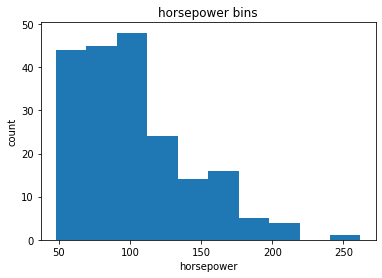

In [141]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of horsepower we want to set start_value=min(df["horsepower"]).</p>
<p>Since we want to include the maximum value of horsepower we want to set end_value=max(df["horsepower"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4.</p>


We build a bin array, with a minimum value to a maximum value, with bandwidth calculated above. The bins will be values used to determine when one bin ends and another begins.


 We set group  names:


 We apply the function "cut" the determine what each value of "df['horsepower']" belongs to. 


Lets see the number of vehicles in each bin.


In [164]:
df["horsepower-bins"].value_counts()

low       153
medium     43
high        5
Name: horsepower-bins, dtype: int64

Lets plot the distribution of each bin.


Text(0.5, 1.0, 'horsepower bins')

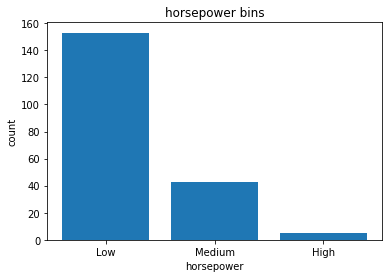

In [146]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-bins"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Check the dataframe above carefully, you will find the last column provides the bins for "horsepower" with 3 categories ("Low","Medium" and "High"). 
</p>
<p>
    We successfully narrow the intervals from 57 to 3!
</p>


<h3>Bins visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'horsepower bins')

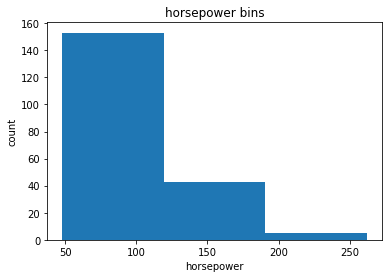

In [166]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw histogram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df['horsepower'], bins=3)

# add labels and title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

The plot above shows the binning result for attribute "horsepower". 


<h2 id="indicator">Indicator variable (or dummy variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    So we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.
</p>

<p>
    We will use the panda's method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [149]:
df['fuel-type'].describe()
df['fuel-type'].value_counts()

dummy_var1 = pd.get_dummies(df['fuel-type'])                   # <- assign dummie var values
dummy_var1.rename(columns={'diesel':'fuel-type-diesel', 'gas':'fuel-type-gas'}, inplace=True)    # <- rename columns for clarity

KeyError: 'fuel-type'

In [107]:
#df.drop(['fuel-type: diesel', 'fuel-type: gas'], axis=1).head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-bins,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476,low,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476,low,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421,medium,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667,low,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556,low,Low


change column names for clarity 


If in the dataframe, column fuel-type has a value 'gas' in the first row gas will be '1' and diesel value will be taken as '0'.

Similarly for row having diesel it will be 1 for diesel and 0 for gas. 


In [ ]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [ ]:
df.head()

The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>As above, create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.</b>

</div>


In [159]:
# Write your code below and press Shift+Enter to execute 
df.head()

#help(pd.get_dummies)
dummy_var2 = pd.get_dummies(df['aspiration'])
dummy_var2.head()

dummy_var2.rename(columns={'std':'aspiration-type: std', 'turbo':'aspiration-type: turbo'}, inplace=True)

Double-click <b>here</b> for the solution.

<!-- The answer is below:

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

-->


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe then drop the column 'aspiration'</b>

</div>


In [163]:
# Write your code below and press Shift+Enter to execute 
df = pd.concat([df, dummie_var2], axis=1)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,price,city-L/100km,horsepower-bins,horsepower-binned,fuel-type: diesel,fuel-type: gas,aspiration-type: std,aspiration-type: turbo,aspiration-type: std,aspiration-type: turbo
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,13495.0,11.190476,low,Low,0,1,1,0,1,0
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,16500.0,11.190476,low,Low,0,1,1,0,1,0
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,16500.0,12.368421,medium,Medium,0,1,1,0,1,0
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,13950.0,9.791667,low,Low,0,1,1,0,1,0
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,17450.0,13.055556,low,Low,0,1,1,0,1,0


Double-click <b>here</b> for the solution.

<!-- The answer is below:

#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

-->


save the new csv 


In [ ]:
#df.to_csv('clean_df.csv')

### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/" target="_blank">Fiorella Wenver</a>

<a href=" https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


# Summary

In [ ]:
#----------------- 1. Missing Values

# count missing values to determine how we should deal with them
import numpy as np
df.replace("?", np.nan, inplace=True)       # <- replaces "?" w/ NaN
missing_data = df.isnull()      # <- creates copy of df where NaN values replaced with True and non-missing values with False

for column in missing_data.columns.values.tolist():         # <- for each column in a list of column headers
    print(column)                                           # <- print column name
    print(missing_data[column].value_counts())              # <- print .isnull() True/False counts
    print("")                                               # <- puts linebreak between each loop



# remove missing values
df.dropna(subset=["col-name"], axis=0, inplace=True)    # <- axis=0 drops entire row; axis=1 drops entire column; inplace=TRUE overwrites df
df.reset_index(drop=True, inplace=True)                 # reset indec after drops

# replace missing values
df.replace(missing_value, new_value)                     



# Examples
mean = df["col-1"].astype("float").mean()
df["col-1"].replace(np.nan, mean)                       # <- replaces missing values with feature mean (numerical data)

mode = df["col-2"].value_counts().idxmax()
df["col-2"].replace(np.nan, mode)                       # <- replaces missing values with feature mode (categotrical data)

df.loc[df["col-1"]==np.nan, ["col-2", "col-3"]]         # <- checks if missing data has been replaced in columns 1, 2, and 3

In [ ]:
#----------------- 2. Data formatting
# mutate feature
df["col-name"] = df["col-name"] + ...    

# rename column
df.rename(columns = {"col-name": "new-col_name"}, inplace=True)

# change feature's data type
df["col-name"] = df["col-name"].astype("int")            # <- converts to int64 type

In [ ]:
#----------------- 3. Data normalization
# simple feature scaling (x/x_max => 0-1)
df["col-name"] = df["col-name"]/df["col-name"].max()

# min-max (x - x_min / x_max - x_min => 0-1)
df["col-name"] = (df["col-name"] - df["col-name"].min())/(df["col-name"].max()-df["col-name"].min())

# standard score (x - mu / sd)
df["col-name"] = (df["col-name"] - df["col-name"].mean)/df["col-name"].std()

In [ ]:
#----------------- Binning
# create bins
import numpy as np
bins = np.linspace(min(df["unbinned-col"]), max(df["unbinned-col"]), x)     # <- create bins; x is number of dividers (number bins + 1)
group_names = ["...", "...", "..."]                                         # <- create bin labels

# sort data into bins
df['binned-col'] = pd.cut(df['unbinned-col'], bins, labels=group_names, include_lowest=True)     

# if you want you can drop the column wiht the un-binned data
df.drop('unbinned-col', axis=1, inplace=True)

# plotting bins with histogram
%matplotlib inline
import matplotlib as plt
form matplotlib import pyplot

plt.pyplot.hist(df['unbinned-col'], bins=x-1)
plt.pyplot.xlabel("x-axis label (aka unbinned-col)")
plt.pyplot.ylabel("count")
plt.pyplot.title("plot title (aka unbinned-col bins")

In [ ]:
#----------------- Converting categorical var -> numerical
# one hot encoding (dummy variables)
dummie_var1 = pd.get_dummies(df['categorical-feature'])                # <- cretates new features corresponding to # of unique categories and assigns 0 vs. 1

# merge dummie variable features with df
df = pd.concat([dummie_var1, df], axis=1)                   # <- axis=1 merges columns; axis=0 merges rows

# drop source of dummy var if you want
df.drop('categorical-feature', axis=1, inplace=True)